# Quantitative exercise
By Group 1: Ya Ting Hu & Zhen Tian

In [44]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import random
import collections

In [2]:
random.seed(1234)
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
dataframe = pd.read_csv(url, header=None)

In [3]:
dataframe = dataframe.rename(columns={0: "age", 1: "year", 2:"nodes",3:"survival"})
dataframe["survival"].replace({2:0},inplace=True)

In [55]:
dataframe.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [60]:
values = dataframe.values
X, y = values[:, :-1], values[:, -1]
def sample_class_dist(X,y, verbose=False):
    
    n_rows = X.shape[0]
    n_cols = X.shape[1]
    classes = np.unique(y)
    n_classes = len(classes)
    if verbose == True:
        print('N Examples: %d' % n_rows)
        print('N Inputs: %d' % n_cols)
        print('N Classes: %d' % n_classes)
        print('Classes: %s' % classes)
    print('Class Breakdown:')

    breakdown = ''
    for c in classes:
        total = len(y[y == c])
        ratio = (total / float(len(y))) * 100
        print(' - Class %s: %d (%.5f%%)' % (str(c), total, ratio))

    # ratio of the number of instances from the negative class and the positive class
    try:
        print("Imbalanced ratio (IR): ", round(y.value_counts()[0]/y.value_counts()[1],2))
    except:
        print("Imbalanced ratio (IR): ", round(collections.Counter(y)[1]/collections.Counter(y)[0],2))

In [61]:
sample_class_dist(X_resampled,y_resampled, verbose=True)

N Examples: 376
N Inputs: 3
N Classes: 2
Classes: [0 1]
Class Breakdown:
 - Class 0: 188 (50.00000%)
 - Class 1: 188 (50.00000%)
Imbalanced ratio (IR):  1.0


# Split 80% 20%

In [56]:
dataframe.head()

,age,year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [29]:
from sklearn.model_selection import train_test_split

# defining the dependent and independent variables
Xtrain = dataframe.loc[:, dataframe.columns != "survival"]
ytrain = dataframe["survival"]

X_train, X_test, y_train, y_test = train_test_split(Xtrain,ytrain, train_size=0.8, random_state=0)

# Undersampling


In [62]:
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
enn = RepeatedEditedNearestNeighbours()
X_ENN_UnderSampled, y_ENN_UnnderSampled = enn.fit_resample(X_train, y_train)
sample_class_dist(X_ENN_UnderSampled, y_ENN_UnnderSampled)

from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule()
X_NCR_UnderSampled, y_NCR_UnnderSampled = ncr.fit_resample(X_train, y_train)
sample_class_dist(X_NCR_UnderSampled, y_NCR_UnnderSampled)

Class Breakdown:
 - Class 0: 56 (34.35583%)
 - Class 1: 107 (65.64417%)
Imbalanced ratio (IR):  0.52


# Oversampling

In [63]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_OverSampled, y_OverSampled = ros.fit_resample(X_train, y_train)
sample_class_dist(X_OverSampled, y_OverSampled)

Class Breakdown:
 - Class 0: 188 (50.00000%)
 - Class 1: 188 (50.00000%)
Imbalanced ratio (IR):  1.0


# Hybrid

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_resampled, y_resampled) # doctest : +ELLIPSIS

##### Logistic

In [7]:


Xtest = test.loc[:, train.columns != "survival"]
ytest = test["survival"]

import statsmodels.api as sm
import pandas as pd
 
# defining the dependent and independent variables
Xtrain = train.loc[:, train.columns != "survival"]
ytrain = train["survival"]
  
# building the model and fitting the data
log_reg = sm.Logit(ytrain, Xtrain).fit();

# performing predictions on the test datdaset
yhat = log_reg.predict(Xtest)
prediction = list(map(round, yhat))
 
# comparing original and predicted values of y
print('Actual values', list(ytest.values))
print('Predictions :', prediction)

Optimization terminated successfully.
         Current function value: 0.551424
         Iterations 5
Actual values [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
Predictions : [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve, auc

clf_LogisticRegression = LogisticRegression(random_state=0).fit(Xtrain, ytrain)
y_score = clf_LogisticRegression.decision_function(Xtest)
pred_prob1 = clf_LogisticRegression.predict_proba(Xtest)



In [9]:
y_score = clf.decision_function(Xtest)
pred_prob1 = clf.predict_proba(Xtest)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(ytest, pred_prob1[:,1], pos_label=1)
# fpr2, tpr2, thresh2 = roc_curve(ytest, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(ytest))]
p_fpr, p_tpr, _ = roc_curve(ytest, random_probs, pos_label=1)

# auc scores
auc_score1 = roc_auc_score(ytest, pred_prob1[:,1])
# auc_score2 = roc_auc_score(ytest, pred_prob2[:,1])

print("Auc score Logistic Regression:", auc_score1)

Auc score Logistic Regression: 0.8103448275862069


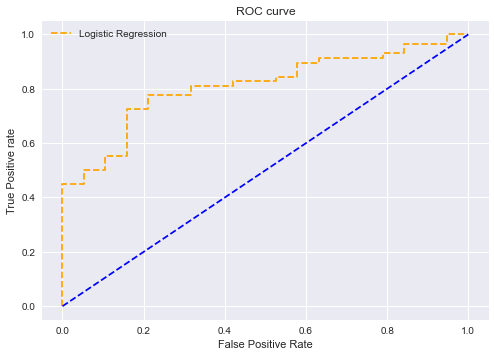

In [10]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
# plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();

#### 6. Generate some visual aids (such as tables or graphs) to present your data to others.
See above figures.